In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import optimize

https://stackoverflow.com/questions/78549738/least-square-inaccurate-in-chemical-speciation

In [2]:
pK = np.array([2.81, 2.27, 1.77, 1.27, 0.81, 0.15])

In [3]:
pKs = np.cumsum(pK)

In [4]:
#pK = np.array([2.80, 5.04, 6.77, 7.96, 8.71, 8.74])

In [5]:
def monom(i, pK, L):
    K = np.power(10., pK)
    return np.power(L, i) * np.prod(K[:i])

In [6]:
def polynom(pK, L):
    return np.sum([monom(i, pK, L) for i in range(len(pK) + 1)], axis=0)

In [7]:
def alpha(i, pK, L):
    return monom(i, pK, L) / polynom(pK, L)

In [8]:
def alphas(pK, L):
    return np.array([
        alpha(i, pK, L)
        for i in range(len(pK) + 1)
    ]).T

In [23]:
L = np.logspace(-5, 1, 200)
As = alphas(pK, L)

In [24]:
np.allclose(np.sum(As, axis=1), 1.)

True

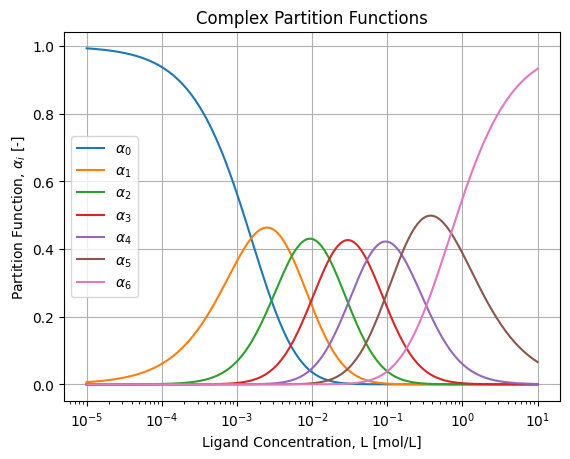

In [25]:
fig, axe = plt.subplots()
axe.semilogx(L, As)
axe.set_title("Complex Partition Functions")
axe.set_xlabel("Ligand Concentration, L [mol/L]")
axe.set_ylabel(r"Partition Function, $\alpha_i$ [-]")
axe.legend([r"$\alpha_{%d}$" % i for i in range(len(pK) + 1)])
axe.grid()

In [26]:
Lt = np.sum(As * np.arange(len(pK) + 1), axis=1) + L

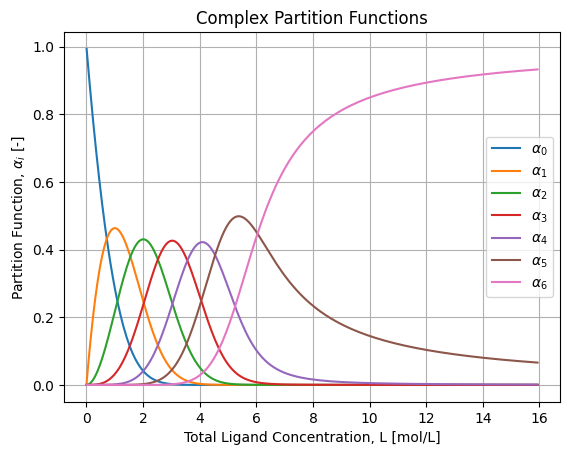

In [28]:
fig, axe = plt.subplots()
axe.plot(Lt, As)
axe.set_title("Complex Partition Functions")
axe.set_xlabel("Total Ligand Concentration, L [mol/L]")
axe.set_ylabel(r"Partition Function, $\alpha_i$ [-]")
axe.legend([r"$\alpha_{%d}$" % i for i in range(len(pK) + 1)])
axe.grid()